<a href="https://colab.research.google.com/github/SimreAniri/Neural-Networks/blob/master/Lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Concatenate

from tensorflow.keras.utils import plot_model 

In [ ]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 5
data_augmentation = True
num_predictions = 20

In [ ]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [ ]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени
Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1563/1563 [==============================] - 38s 20ms/step - loss: 2.0522 - accuracy: 0.2338 - val_loss: 1.5782 - val_accuracy: 0.4301
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6473 - accuracy: 0.3962 - val_loss: 1.3939 - val_accuracy: 0.4980
Epoch 3/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5134 - accuracy: 0.4505 - val_loss: 1.2927 - val_accuracy: 0.5400
Epoch 4/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4208 - accuracy: 0.4859 - val_loss: 1.2042 - val_accuracy: 0.5739
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.1739 - accuracy: 0.5812
Test loss: 1.1739498376846313
Test accuracy: 0.5812000036239624


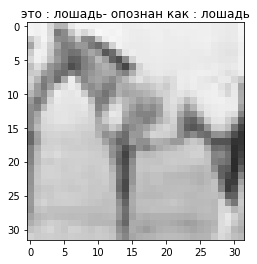

In [ ]:
N = 83
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [ ]:
x_train.shape[1:]

(32, 32, 3)

Попробуем сделать несколько нитей:

In [ ]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x11 = Conv2D(32, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(64, (3, 3), padding='same', activation='relu')(x11)
x11 = Conv2D(64, (3, 3), activation='relu')(x11)
first = MaxPooling2D(pool_size=(2, 2))(x11)


x22 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x22 = Conv2D(32, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Conv2D(64, (3, 3), padding='same', activation='relu')(x22)
x22 = Conv2D(64, (3, 3), activation='relu')(x22)
second = MaxPooling2D(pool_size=(2, 2))(x22)

merge_one = Concatenate()([first, second])

x = Flatten()(merge_one)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model2 = Model(inputs=first_input, outputs=x)

In [ ]:
# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

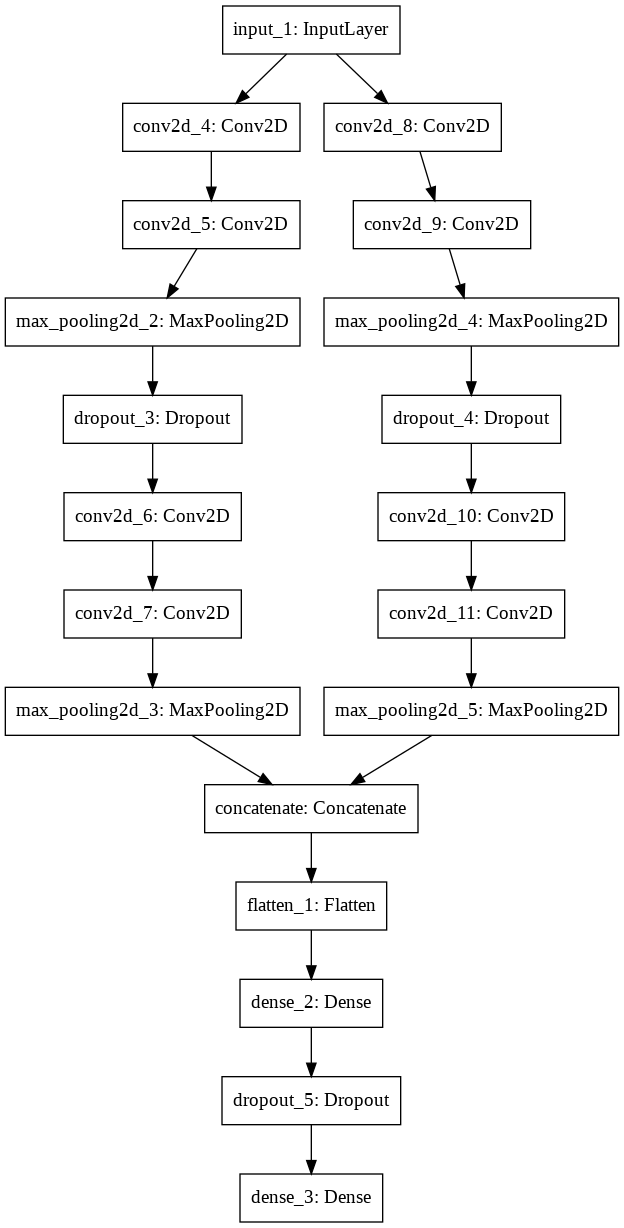

In [ ]:
plot_model(model2, 'model2.png')

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 30, 30, 32)   9248        conv2d_4[0][0]                   
______________________________________________________________________________________________

In [ ]:
data_augmentation = False

In [ ]:
batch_size = 32
num_classes = 10
epochs = 5
num_predictions = 20

In [ ]:
if not data_augmentation:
    print('Не используется data augmentation')
    model2.fit(x_train, y_train, 
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)
    
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Не используется data augmentation
Epoch 1/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.1486 - accuracy: 0.2013 - val_loss: 1.7846 - val_accuracy: 0.3624
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7482 - accuracy: 0.3700 - val_loss: 1.5558 - val_accuracy: 0.4388
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5642 - accuracy: 0.4370 - val_loss: 1.3907 - val_accuracy: 0.4992
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4317 - accuracy: 0.4854 - val_loss: 1.2918 - val_accuracy: 0.5359
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3264 - accuracy: 0.5259 - val_loss: 1.2285 - val_accuracy: 0.5592


In [ ]:
# проверка работы обученной модели
scores = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.2285 - accuracy: 0.5592
Test loss: 1.2284717559814453
Test accuracy: 0.5591999888420105


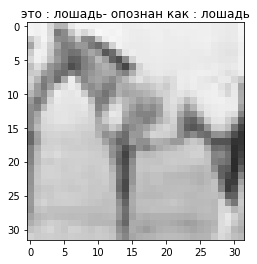

In [ ]:
N = 83
y_p=model2.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [ ]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x11 = Conv2D(32, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(64, (3, 3), padding='same', activation='relu')(x11)
x11 = Conv2D(128, (3, 3), activation='relu')(x11)
first = MaxPooling2D(pool_size=(2, 2))(x11)


x22 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x22 = Conv2D(32, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Conv2D(64, (3, 3), padding='same', activation='relu')(x22)
x22 = Conv2D(128, (3, 3), activation='relu')(x22)
second = MaxPooling2D(pool_size=(2, 2))(x22)

merge_one = Concatenate()([first, second])

x = Flatten()(merge_one)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model3 = Model(inputs=first_input, outputs=x)

In [ ]:
# компиляция модели
model3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
print('Не используется data augmentation')
model3.fit(x_train, y_train, 
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

Не используется data augmentation
Epoch 1/5
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1424 - accuracy: 0.2014 - val_loss: 1.8085 - val_accuracy: 0.3522
Epoch 2/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7409 - accuracy: 0.3737 - val_loss: 1.5272 - val_accuracy: 0.4591
Epoch 3/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5208 - accuracy: 0.4487 - val_loss: 1.4574 - val_accuracy: 0.4784
Epoch 4/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3927 - accuracy: 0.5032 - val_loss: 1.2990 - val_accuracy: 0.5429
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2966 - accuracy: 0.5360 - val_loss: 1.1981 - val_accuracy: 0.5782


In [ ]:
# проверка работы обученной модели
scores = model3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.1981 - accuracy: 0.5782
Test loss: 1.1980620622634888
Test accuracy: 0.5781999826431274


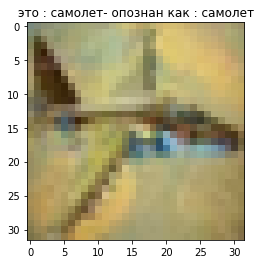

In [ ]:
N = 919
y_p=model3.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Есть небольшой рост метрики от увеличения ширины слоев

In [ ]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x11 = Conv2D(32, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(64, (3, 3), padding='same', activation='relu')(x11)
x11 = Conv2D(64, (3, 3), activation='relu')(x11)
first = MaxPooling2D(pool_size=(2, 2))(x11)


x22 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x22 = Conv2D(32, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Conv2D(64, (3, 3), padding='same', activation='relu')(x22)
x22 = Conv2D(64, (3, 3), activation='relu')(x22)
second = MaxPooling2D(pool_size=(2, 2))(x22)


x33 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x33 = Conv2D(32, (3, 3), activation='relu')(x33)
x33 = MaxPooling2D(pool_size=(2, 2))(x33)
x33 = Dropout(0.25)(x33)

x33 = Conv2D(64, (3, 3), padding='same', activation='relu')(x33)
x33 = Conv2D(64, (3, 3), activation='relu')(x33)
third = MaxPooling2D(pool_size=(2, 2))(x33)


merge_one = Concatenate()([first, second, third])

x = Flatten()(merge_one)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model4 = Model(inputs=first_input, outputs=x)

In [ ]:
# компиляция модели
model4.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
print('Не используется data augmentation')
model4.fit(x_train, y_train, 
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

Не используется data augmentation
Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 2.1800 - accuracy: 0.1871 - val_loss: 1.8884 - val_accuracy: 0.3261
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7813 - accuracy: 0.3595 - val_loss: 1.5431 - val_accuracy: 0.4519
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5502 - accuracy: 0.4429 - val_loss: 1.3698 - val_accuracy: 0.5094
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4149 - accuracy: 0.4888 - val_loss: 1.3019 - val_accuracy: 0.5455
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3235 - accuracy: 0.5273 - val_loss: 1.2214 - val_accuracy: 0.5600


In [ ]:
# проверка работы обученной модели
scores = model4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.2214 - accuracy: 0.5600
Test loss: 1.221399188041687
Test accuracy: 0.5600000023841858


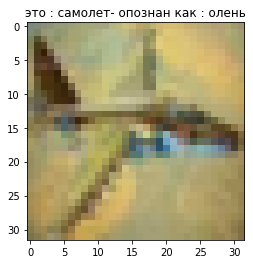

In [ ]:
N = 919
y_p=model4.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Дополнительная ветвь не улудшила метрику

In [ ]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, (5, 5), padding='same', activation='relu')(first_input)
x11 = Conv2D(32, (5, 5), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(32, (5, 5), padding='same', activation='relu')(x11)
x11 = Conv2D(32, (5, 5), activation='relu')(x11)
first = MaxPooling2D(pool_size=(2, 2))(x11)


x22 = Conv2D(64, (5, 5), padding='same', activation='relu')(first_input)
x22 = Conv2D(64, (5, 5), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Conv2D(64, (5, 5), padding='same', activation='relu')(x22)
x22 = Conv2D(64, (5, 5), activation='relu')(x22)
second = MaxPooling2D(pool_size=(2, 2))(x22)


x33 = Conv2D(64, (5, 5), padding='same', activation='relu')(first_input)
x33 = Conv2D(64, (5, 5), activation='relu')(x33)
x33 = MaxPooling2D(pool_size=(2, 2))(x33)
x33 = Dropout(0.25)(x33)

x33 = Conv2D(128, (5, 5), padding='same', activation='relu')(x33)
x33 = Conv2D(128, (5, 5), activation='relu')(x33)
third = MaxPooling2D(pool_size=(2, 2))(x33)


merge_one = Concatenate()([first, second, third])

x = Flatten()(merge_one)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model5 = Model(inputs=first_input, outputs=x)

In [ ]:
# компиляция модели
model5.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
print('Не используется data augmentation')
model5.fit(x_train, y_train, 
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

Не используется data augmentation
Epoch 1/5
1563/1563 [==============================] - 28s 17ms/step - loss: 2.1243 - accuracy: 0.2084 - val_loss: 1.6462 - val_accuracy: 0.4038
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6556 - accuracy: 0.3977 - val_loss: 1.4513 - val_accuracy: 0.4762
Epoch 3/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4655 - accuracy: 0.4726 - val_loss: 1.4110 - val_accuracy: 0.5024
Epoch 4/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3396 - accuracy: 0.5193 - val_loss: 1.2421 - val_accuracy: 0.5507
Epoch 5/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2443 - accuracy: 0.5608 - val_loss: 1.1476 - val_accuracy: 0.5923


In [ ]:
# проверка работы обученной модели
scores = model5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 1.1476 - accuracy: 0.5923
Test loss: 1.1476157903671265
Test accuracy: 0.5922999978065491


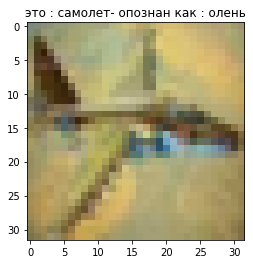

In [ ]:
N = 919
y_p=model5.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Попробуем дообучить последний вариант сети

In [ ]:
epochs = 10

In [ ]:
print('Использование data augmentation в реальном времени')
# Препроцессинг и data augmentation в реальном времени:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=0, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0., 
    zoom_range=0., 
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0)

# запуск data augmentation через fit_generator
model5.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Использование data augmentation в реальном времени
Epoch 1/10
   3/1563 [..............................] - ETA: 51s - loss: 1.1241 - accuracy: 0.5833 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1563/1563 [==============================] - 37s 23ms/step - loss: 1.0132 - accuracy: 0.6417 - val_loss: 0.9039 - val_accuracy: 0.6813
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9765 - accuracy: 0.6560 - val_loss: 0.9192 - val_accuracy: 0.6819
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9397 - accuracy: 0.6709 - val_loss: 0.8063 - val_accuracy: 0.7236
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9065 - accuracy: 0.6824 - val_loss: 0.7822 - val_accuracy: 0.7256
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8729 - accuracy: 0.6943 - val_loss: 0.7597 - val_accuracy: 0.7371
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8462 - accuracy: 0.7031 - val_loss: 0.7369 - val_accuracy: 0.7415
Epoch 7/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8209 - accuracy: 0.7130 - val_loss: 0.7623 - val_accura

In [ ]:
# проверка работы обученной модели
scores = model5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.6558 - accuracy: 0.7705
Test loss: 0.6557536721229553
Test accuracy: 0.7705000042915344


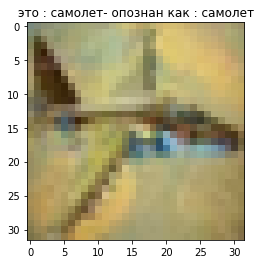

In [ ]:
N = 919
y_p=model5.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

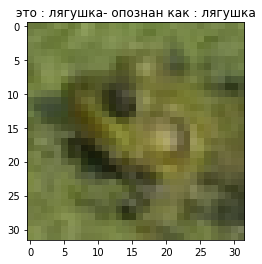

In [ ]:
N = 49
y_p=model5.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

 

---

---



